# Forward and Backprop Example Notebook

<p float="left">
    <img src="./math_derivations/main.png" width="600" height="300">
    <img src="./math_derivations/values.png" height="300">
</p>

## Forward Propagation

<img src="./math_derivations/equations.png" width="600">


In [23]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def mse(target, output):
    return (target - output) ** 2 / 2

class Neuron:
    def __init__(self, name, value=0, weights=[], activation_fn=sigmoid):
        self.name = name
        self.value = value
        self.weights = weights
        self.input_value = None
        self.activation_fn = activation_fn
    
    def compute_input_value(self, inputs, bias=None):
        if len(inputs) != len(self.weights):
            raise ValueError('Incorrect input shape')
        
        input_sum = 0
        for inp, w in zip(inputs, self.weights):
            input_sum += inp.value * w
        
        if bias:
            input_sum += bias.value * bias.weights[0]
        
        self.input_value = input_sum

    def compute_output_value(self):
        self.value = self.activation_fn(self.input_value)
        
    def compute_error(self, target):
        self.target = target
        self.error_value = mse(target, self.value)

    def update_weights(self, gradients, learning_rate):
        if len(gradients) != len(self.weights):
            raise ValueError('Number of gradients do not match the number of weights')
        
        for i in range(len(gradients)):
            self.weights[i] -= learning_rate * gradients[i]



In [24]:
x1 = Neuron('input_1', value=0.05)
x2 = Neuron('input_2', value=0.10)

h1 = Neuron('h1', weights=[0.15, 0.20])
h2 = Neuron('h2', weights=[0.25, 0.30])

o1 = Neuron('o1', weights=[0.40, 0.45])
o2 = Neuron('o2', weights=[0.50, 0.55])

b1 = Neuron('b1', value=1, weights=[0.35])
b2 = Neuron('b2', value=1, weights=[0.60])

<img src="./math_derivations/fh.png" width="600">


In [25]:
h1.compute_input_value([x1, x2], bias=b1)
h2.compute_input_value([x1, x2], bias=b1)
print(f"{h1.input_value = }")
print(f"{h2.input_value = }")

h1.input_value = 0.3775
h2.input_value = 0.39249999999999996


<img src="./math_derivations/fh_out.png" width="600">


In [26]:
h1.compute_output_value()
h2.compute_output_value()
print(f"{h1.value = }")
print(f"{h2.value = }")

h1.value = 0.5932699921071872
h2.value = 0.596884378259767


<img src="./math_derivations/fo.png" width="600">


In [27]:
o1.compute_input_value([h1, h2], bias=b2)
o2.compute_input_value([h1, h2], bias=b2)
print(f"{o1.input_value = }")
print(f"{o2.input_value = }")

o1.input_value = 1.10590596705977
o2.input_value = 1.2249214040964653


In [28]:
o1.compute_output_value()
o2.compute_output_value()
print(f"{o1.value = }")
print(f"{o2.value = }")

o1.value = 0.7513650695523157
o2.value = 0.7729284653214625


<img src="./math_derivations/error.png" width="600">


In [29]:
o1.compute_error(0.01)
o2.compute_error(0.99)
total_error = o1.error_value + o2.error_value

print(f"{o1.error_value = }")
print(f"{o2.error_value = }")
print(f"{total_error = }")

o1.error_value = 0.274811083176155
o2.error_value = 0.023560025583847746
total_error = 0.2983711087600027


## Backward Propagation

In [30]:
learning_rate = 0.5

<img src="./math_derivations/d1.png" width="600">

In [31]:
dh1_dw1 = x1.value
dh1_dw2 = x2.value
dh2_dw3 = x1.value
dh2_dw4 = x2.value

<img src="./math_derivations/d2.png" width="600" width="900"/>

In [32]:
dh1_out_dw1 = h1.value * (1 - h1.value) * dh1_dw1
dh1_out_dw2 = h1.value * (1 - h1.value) * dh1_dw2

dh2_out_dw3 = h2.value * (1 - h2.value) * dh2_dw3
dh2_out_dw4 = h2.value * (1 - h2.value) * dh2_dw4

<p float="left">
  <img src="./math_derivations/d3.png" width="600" height="600"/>
  <img src="./math_derivations/d4.png" width="600" height="600"/>
</p>

In [33]:
do1_dw1 = o1.weights[0] * dh1_out_dw1
do1_dw2 = o1.weights[0] * dh1_out_dw2
do1_dw3 = o1.weights[1] * dh2_out_dw3
do1_dw4 = o1.weights[1] * dh2_out_dw4

do2_dw1 = o2.weights[0] * dh1_out_dw1
do2_dw2 = o2.weights[0] * dh1_out_dw2
do2_dw3 = o2.weights[1] * dh2_out_dw3
do2_dw4 = o2.weights[1] * dh2_out_dw4

<img src="./math_derivations/d5.png" width="600" height="600">

In [34]:
do1_out_dw1 = o1.value * (1 - o1.value) * do1_dw1
do1_out_dw2 = o1.value * (1 - o1.value) * do1_dw2
do1_out_dw3 = o1.value * (1 - o1.value) * do1_dw3
do1_out_dw4 = o1.value * (1 - o1.value) * do1_dw4

do2_out_dw1 = o2.value * (1 - o2.value) * do2_dw1
do2_out_dw2 = o2.value * (1 - o2.value) * do2_dw2
do2_out_dw3 = o2.value * (1 - o2.value) * do2_dw3
do2_out_dw4 = o2.value * (1 - o2.value) * do2_dw4

<img src="./math_derivations/d6.png" width="600" height="600">

In [35]:
do1_error_dw1 = -(o1.target - o1.value) * do1_out_dw1
do1_error_dw2 = -(o1.target - o1.value) * do1_out_dw2
do1_error_dw3 = -(o1.target - o1.value) * do1_out_dw3
do1_error_dw4 = -(o1.target - o1.value) * do1_out_dw4

do2_error_dw1 = -(o2.target - o2.value) * do2_out_dw1
do2_error_dw2 = -(o2.target - o2.value) * do2_out_dw2
do2_error_dw3 = -(o2.target - o2.value) * do2_out_dw3
do2_error_dw4 = -(o2.target - o2.value) * do2_out_dw4

<img src="./math_derivations/d7.png" width="600" >

In [36]:
dtotal_error_dw1 = do1_error_dw1 + do2_error_dw1
dtotal_error_dw2 = do1_error_dw2 + do2_error_dw2
dtotal_error_dw3 = do1_error_dw3 + do2_error_dw3
dtotal_error_dw4 = do1_error_dw4 + do2_error_dw4

<img src="./math_derivations/d8.png" width="600" >

In [37]:
dtotal_error_dw5 = -(o1.target - o1.value) * o1.value * (1 - o1.value) * h1.value
dtotal_error_dw6 = -(o1.target - o1.value) * o1.value * (1 - o1.value) * h2.value

dtotal_error_dw7 = -(o2.target - o2.value) * o2.value * (1 - o2.value) * h1.value
dtotal_error_dw8 = -(o2.target - o2.value) * o2.value * (1 - o2.value) * h2.value

### Gradient Update

In [38]:
o1.update_weights([dtotal_error_dw5, dtotal_error_dw6], learning_rate)
o2.update_weights([dtotal_error_dw7, dtotal_error_dw8], learning_rate)

print(f"{o1.weights = }")
print(f"{o2.weights = }")

o1.weights = [0.35891647971788465, 0.4086661860762334]
o2.weights = [0.5113012702387375, 0.5613701211079891]


In [39]:
h1.update_weights([dtotal_error_dw1, dtotal_error_dw2], learning_rate)
h2.update_weights([dtotal_error_dw3, dtotal_error_dw4], learning_rate)

print(f"{h1.weights = }")
print(f"{h2.weights = }")

h1.weights = [0.1497807161327628, 0.19956143226552567]
h2.weights = [0.24975114363236958, 0.29950228726473915]


## Putting it all together

In [40]:
def forward(inputs, hidden_states, outputs, biases, target):
    if len(target) != len(outputs):
        raise ValueError("Target shape does not match output shape")
    
    for h in hidden_states:
        h.compute_input_value(inputs, biases[0])
        h.compute_output_value()
    
    total_error = 0
    for o, t in zip(outputs, target):
        o.compute_input_value(hidden_states, biases[1])
        o.compute_output_value()
        o.compute_error(t)
        total_error += o.error_value
    
    return total_error

def backprop(inputs, hidden_states, outputs, learning_rate):
    dE_dws = []

    for i, h in enumerate(hidden_states):
        for x in inputs:
            dE_dw = 0
            for o in outputs:
                dE_dw += -(o.target - o.value) * o.weights[i] * o.value * (1 - o.value) * x.value * h.value * (1 - h.value)
            dE_dws.append(dE_dw)

    for o in outputs:
        for h in hidden_states:
            dE_dw = -(o.target - o.value) * o.value * (1 - o.value) * h.value
            dE_dws.append(dE_dw)

    for h in hidden_states:
        h.update_weights(dE_dws[:len(h.weights)], learning_rate)
        dE_dws = dE_dws[len(h.weights):]
    
    for o in outputs:
        o.update_weights(dE_dws[:len(o.weights)], learning_rate)
        dE_dws = dE_dws[len(o.weights):]

In [41]:
x1 = Neuron('input_1', value=0.05)
x2 = Neuron('input_2', value=0.10)

h1 = Neuron('h1', weights=[0.15, 0.20])
h2 = Neuron('h2', weights=[0.25, 0.30])

o1 = Neuron('o1', weights=[0.40, 0.45])
o2 = Neuron('o2', weights=[0.50, 0.55])

b1 = Neuron('b1', value=1, weights=[0.35])
b2 = Neuron('b2', value=1, weights=[0.60])

In [42]:
from tqdm import tqdm

inputs = [x1, x2]
hidden_states = [h1, h2]
outputs = [o1, o2]
biases = [b1, b2]
target = [0, 1]

learning_rate =  2

def train(epochs):
    losses = []
    batch = tqdm(range(epochs))
    for i in batch:
        loss = forward(inputs, hidden_states, outputs, biases, target)
        backprop(inputs, hidden_states, outputs, learning_rate)
        losses.append(loss)
        batch.set_postfix({"Loss": f"{loss:.15f}"})

    return losses

losses = train(1000)

100%|██████████| 1000/1000 [00:01<00:00, 808.18it/s, Loss=0.000356485068170]


In [43]:
print(f"{outputs[0].value = }")
print(f"{outputs[1].value = }")

outputs[0].value = 0.018914066818667655
outputs[1].value = 0.9811525011548469


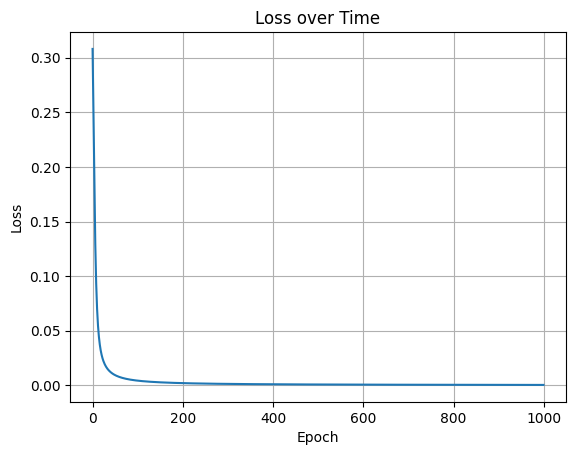

In [44]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Time")
plt.grid(True)
plt.show()